In [126]:
import numpy as np

def apply_pmd(E_in, DGD_ps_per_sqrt_km, L_m, N_sections, Rs, SpS):

    N_samples = E_in.shape[0]
    SD_tau = np.sqrt(3 * np.pi / 8) * DGD_ps_per_sqrt_km

    tau = (SD_tau * np.sqrt(L_m * 1e-3) / np.sqrt(N_sections)) * 1e-12

    w = 2 * np.pi * np.fft.fftshift(np.linspace(-0.5, 0.5, N_samples)) * SpS * Rs

    E_V = np.fft.fft(E_in[:, 0])
    E_H = np.fft.fft(E_in[:, 1])

    for _ in range(N_sections):
        # Random complex coupling matrices (unitary)
        X = np.random.randn(2, 2) + 1j * np.random.randn(2, 2)
        U, _, Vh = np.linalg.svd(X)
        V = Vh.conj().T

        # Rotate fields by U†
        E1 = U[0, 0].conj() * E_V + U[0, 1].conj() * E_H
        E2 = U[1, 0].conj() * E_V + U[1, 1].conj() * E_H

        # Apply differential delay
        E1 *= np.exp(1j * w * tau / 2)
        E2 *= np.exp(-1j * w * tau / 2)

        # Rotate by V
        E_V = V[0, 0] * E1 + V[0, 1] * E2
        E_H = V[1, 0] * E1 + V[1, 1] * E2

    E_out_x = np.fft.ifft(E_V)
    E_out_y = np.fft.ifft(E_H)

    return np.column_stack((E_out_x, E_out_y))


In [ ]:
N_symbols = 100
levels = np.array([-3, -1, 1, 3]) / np.sqrt(10)
qam_symbols_x = (np.random.choice(levels, N_symbols) +
               1j * np.random.choice(levels, N_symbols))
qam_symbols_y = (np.random.choice(levels, N_symbols) +
               1j * np.random.choice(levels, N_symbols))

E_in = np.column_stack((qam_symbols_x, qam_symbols_y))  # shape (100, 2)

# check parameters with deepa ma'am
E_out = apply_pmd( 
E_in=E_in, 
DGD_ps_per_sqrt_km=0.1, # typical mean DGD 
L_m=10000, # fiber length
N_sections=20, # number of fiber sections 
Rs=32e9, # 32 gbaud
SpS=2 # samples per symbol 
)

print("Input shape:", E_in.shape)
print("Output shape:", E_out.shape)


Input shape: (100, 2)
Output shape: (100, 2)


In [136]:
print(E_out)

[[-0.97163752+0.9263366j  -0.22023451-0.40670132j]
 [ 0.74316336+0.58857489j  0.46843173-0.28651915j]
 [ 1.09103616+0.19377724j  0.65987321-0.56414347j]
 [-1.01485673+0.17349189j -0.36338089-0.87965307j]
 [-0.39370564+0.79301418j -0.49978292-0.99640846j]
 [-1.27394426-0.59358309j  0.22111698+0.11131796j]
 [-0.71592783+1.09269633j  1.31771391+0.46443357j]
 [ 0.15836286+0.15867276j  0.88929969+1.05136344j]
 [ 0.03953739-0.38105982j  0.34939211+1.31161733j]
 [-0.09151018+0.93725134j  1.01714377-0.10229379j]
 [ 0.3548698 -0.70594375j -1.46070445-0.16777654j]
 [-0.70417527+0.67838436j -0.4942551 +0.05310805j]
 [ 0.18595067-0.5801494j  -0.76558794-1.38037857j]
 [ 0.63895646+0.72337001j  0.06384871+0.48356004j]
 [ 0.29065367+0.37297747j -0.30173136+0.35501355j]
 [-0.82548125-1.10910452j  0.83623543-0.98992493j]
 [ 1.86188751-0.05215135j -0.3265772 -0.02083063j]
 [ 1.00824907+0.34677424j  0.21589766+0.20512968j]
 [ 0.61181788-0.01931941j -0.11564878-0.00797419j]
 [-0.83613451+0.48448605j  0.72

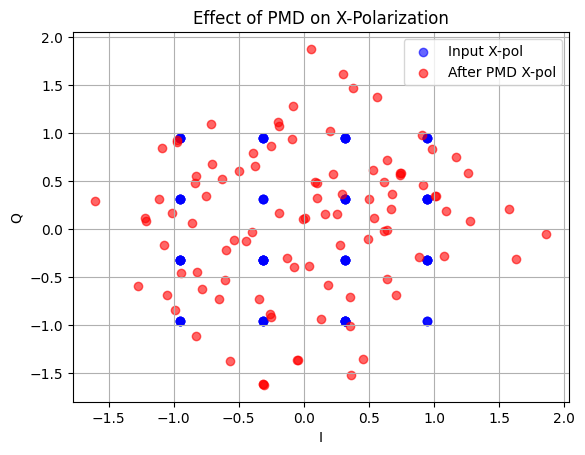

In [135]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(E_in[:, 0].real, E_in[:, 0].imag, color='blue', label='Input X-pol', alpha=0.6)
plt.scatter(E_out[:, 0].real, E_out[:, 0].imag, color='red', label='After PMD X-pol', alpha=0.6)
plt.xlabel('I')
plt.ylabel('Q')
plt.legend()
plt.title('Effect of PMD on X-Polarization')
plt.grid(True)
plt.show()
